In [1]:
print('test')

test


In [2]:
import numpy as np

np.random.seed(42)

In [3]:
m = 100
X = 2*np.random.rand(m,1)
y = 4+3*X+np.random.randn(m,1)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [8]:
model.intercept_

array([4.21509616])

In [9]:
model.coef_

array([[2.77011339]])

In [10]:
# implementation of batch gradient descent.

In [11]:
# Batch Gradient Descent

eta = 0.1
n_epochs = 500000
m = len(X_b)

np.random.seed(42)
theta=np.random.randn(2,1) # initializing the inital model parameters

for epoch in range(n_epochs):
    gradients = 2/m*X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients


In [12]:
theta

array([[4.21509616],
       [2.77011339]])

In [13]:
# Stochastic Gradient Descent

n_epochs = 50
t0,t1=5,50
m = len(X_b)

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi= y[random_index:random_index+1]
        gradients = 2*xi.T @ (xi @ theta -yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
    

In [14]:
theta

array([[4.20742938],
       [2.74264448]])

In [15]:
# Polynomial regression

In [16]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)


In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
model.fit(X_poly, y)

LinearRegression()

In [20]:
model.intercept_, model.coef_

(array([1.7092054]), array([[0.92665422, 0.60293289]]))

In [22]:
# so this PolynimialFeatures allows the data to be converted such that any model can fit linear regression.

learning curve

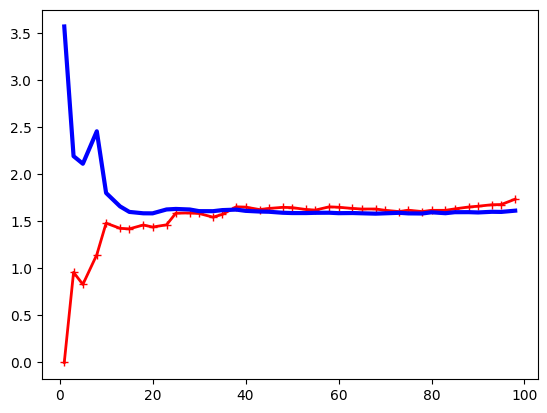

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(),X,y, train_sizes=np.linspace(0.01,1.0,40), cv=50,scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes,train_errors,'r-+',linewidth=2, label='train')
plt.plot(train_sizes,valid_errors,'b-',linewidth=3,label='valid')


In [ ]:
# model is underfitting.
# the train error is increasing and it platues reltively high up.
# Simmilarly the validation error is also flatlining at a high value. 